In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib created a temporary config/cache directory at /var/folders/0g/vdpf_02n38j90z0yhl_pglbc0000gn/T/matplotlib-izqs3tl8 because the default path (/Users/soojin/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 법정동 코드 가공

In [3]:
#
locCode=pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
#읍면동이 NaN인 데이터 추출 > 읍면동 제외
locCode=locCode.dropna(subset=['읍면동명'])
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN


In [5]:
# 시군구가 NaN이 아닌 데이터 추출 > 시도명 제외
locCode=locCode.dropna(subset=['시군구명'])
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN


In [6]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000
locCode['법정동코드']=locCode['법정동코드'].astype(str)
locCode['지역코드']=locCode['법정동코드'].str.slice(start=0, stop=5)
locCode.head()


,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN,11110


In [7]:
# 시도명이 서울특별시인 데이터만 추출 후 시도명, 시군구명, 지역코드 컬럼만 추출 
loc1 = locCode[locCode['시도명']=="서울특별시"]
loc1

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN,11110
...,...,...,...,...,...,...,...,...
488,1174010600,서울특별시,강동구,둔촌동,NaN,19880423,NaN,11740
489,1174010700,서울특별시,강동구,암사동,NaN,19880423,NaN,11740
490,1174010800,서울특별시,강동구,성내동,NaN,19880423,NaN,11740
491,1174010900,서울특별시,강동구,천호동,NaN,19880423,NaN,11740


In [8]:
locCode

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN,11110
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN,11110
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN,11110
5,1111010400,서울특별시,종로구,효자동,NaN,19880423,NaN,11110
6,1111010500,서울특별시,종로구,창성동,NaN,19880423,NaN,11110
...,...,...,...,...,...,...,...,...
20551,5013032022,제주특별자치도,서귀포시,표선면,하천리,20060701,NaN,50130
20552,5013032023,제주특별자치도,서귀포시,표선면,성읍리,20060701,NaN,50130
20553,5013032024,제주특별자치도,서귀포시,표선면,가시리,20060701,NaN,50130
20554,5013032025,제주특별자치도,서귀포시,표선면,세화리,20060701,NaN,50130


# 2. 실거래가 데이터 가공

In [9]:
# 실거래가 데이터 불러오기
apt = pd.read_csv('../data/2020년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티
1,길음동,84.77,18.0,2001,아파트,1200000000,0.0,롯데캐슬 클라시아
2,구로동,36.90,1.0,2001,아파트,105000000,1994.0,궁전아트빌라
3,산천동,59.55,2.0,2001,아파트,830000000,2001.0,리버힐삼성
4,이촌동,64.43,5.0,2001,아파트,735000000,1971.0,강변


In [10]:
# 데이터 프레임의 컬럼을 확인합니다.
apt.columns

Index(['법정동명', '건물면적', '층정보', '건물주용도코드', '건물주용도', '거래금액', '건축년도', '아파트명'], dtype='object')

In [11]:
# 데이터 프레임의 크기(차원)을 조회합니다
apt.shape

(176001, 8)

In [12]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt.isnull().sum()

법정동명           0
건물면적           0
층정보        12163
건물주용도코드        0
건물주용도          0
거래금액           0
건축년도         565
아파트명       12163
dtype: int64

In [13]:
# 실거래가 데이터프레임 정보 조회
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [14]:
# 실거래가 데이터프레임 정보 조회 (거래금액 컬럼 변경 확인)
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176001 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   법정동명     176001 non-null  object 
 1   건물면적     176001 non-null  float64
 2   층정보      163838 non-null  float64
 3   건물주용도코드  176001 non-null  int64  
 4   건물주용도    176001 non-null  object 
 5   거래금액     176001 non-null  int64  
 6   건축년도     175436 non-null  float64
 7   아파트명     163838 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.7+ MB


In [15]:
# 범주화된 전용면적의 고유값을 확인합니다.


In [16]:
apt['건물면적'].unique()

array([ 59.92,  84.77,  36.9 , ..., 536.52, 292.27, 294.03])

# 3. 데이터 프레임 결합

In [17]:
# 지역 코드를 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.
df=pd.merge(apt,loc1,left_on=['법정동명'], right_on=['읍면동명'])
df

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
0,장위동,59.92,5.0,2001,아파트,749000000,0.0,래미안 장위포레카운티,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
1,장위동,116.91,2.0,2001,아파트,1270000000,0.0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
2,장위동,59.99,17.0,2001,아파트,820000000,0.0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
3,장위동,62.55,NaN,1001,단독주택,714600000,1970.0,NaN,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
4,장위동,84.48,12.0,2001,아파트,1150000000,0.0,꿈의숲 아이파크,1129013800,서울특별시,성북구,장위동,NaN,19880423,NaN,11290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179813,구수동,29.98,5.0,2002,연립주택,295000000,2015.0,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440
179814,구수동,64.20,3.0,2002,연립주택,508000000,2009.0,근상프리즘1동,1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440
179815,구수동,29.95,2.0,2002,연립주택,380000000,2015.0,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440
179816,구수동,41.21,3.0,2002,연립주택,390000000,2015.0,동원스위트홈(16-5),1144011300,서울특별시,마포구,구수동,NaN,19880423,NaN,11440


In [18]:
pd.options.display.float_format = '{:.0f}'.format
df['평']=round(df['건물면적']*0.3025)
df['평당가격']=df['거래금액']/df['평']
df

,법정동명,건물면적,층정보,건물주용도코드,건물주용도,거래금액,건축년도,아파트명,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드,평,평당가격
0,장위동,60,5,2001,아파트,749000000,0,래미안 장위포레카운티,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,18,41611111
1,장위동,117,2,2001,아파트,1270000000,0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,35,36285714
2,장위동,60,17,2001,아파트,820000000,0,래미안장위퍼스트하이,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,18,45555556
3,장위동,63,nan,1001,단독주택,714600000,1970,NaN,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,19,37610526
4,장위동,84,12,2001,아파트,1150000000,0,꿈의숲 아이파크,1129013800,서울특별시,성북구,장위동,NaN,19880423,nan,11290,26,44230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179813,구수동,30,5,2002,연립주택,295000000,2015,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,9,32777778
179814,구수동,64,3,2002,연립주택,508000000,2009,근상프리즘1동,1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,19,26736842
179815,구수동,30,2,2002,연립주택,380000000,2015,동원스위트홈,1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,9,42222222
179816,구수동,41,3,2002,연립주택,390000000,2015,동원스위트홈(16-5),1144011300,서울특별시,마포구,구수동,NaN,19880423,nan,11440,12,32500000


In [19]:
df1=df[['건물면적','층정보','건물주용도','거래금액','건축년도','아파트명','시군구명','읍면동명','평','평당가격','지역코드']]
df1

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,시군구명,읍면동명,평,평당가격,지역코드
0,60,5,아파트,749000000,0,래미안 장위포레카운티,성북구,장위동,18,41611111,11290
1,117,2,아파트,1270000000,0,래미안장위퍼스트하이,성북구,장위동,35,36285714,11290
2,60,17,아파트,820000000,0,래미안장위퍼스트하이,성북구,장위동,18,45555556,11290
3,63,nan,단독주택,714600000,1970,NaN,성북구,장위동,19,37610526,11290
4,84,12,아파트,1150000000,0,꿈의숲 아이파크,성북구,장위동,26,44230769,11290
...,...,...,...,...,...,...,...,...,...,...,...
179813,30,5,연립주택,295000000,2015,동원스위트홈,마포구,구수동,9,32777778,11440
179814,64,3,연립주택,508000000,2009,근상프리즘1동,마포구,구수동,19,26736842,11440
179815,30,2,연립주택,380000000,2015,동원스위트홈,마포구,구수동,9,42222222,11440
179816,41,3,연립주택,390000000,2015,동원스위트홈(16-5),마포구,구수동,12,32500000,11440


In [20]:
df1.loc[(df1['건축년도'] == 0),'건축년도']=2000
df1

/Users/soojin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,시군구명,읍면동명,평,평당가격,지역코드
0,60,5,아파트,749000000,2000,래미안 장위포레카운티,성북구,장위동,18,41611111,11290
1,117,2,아파트,1270000000,2000,래미안장위퍼스트하이,성북구,장위동,35,36285714,11290
2,60,17,아파트,820000000,2000,래미안장위퍼스트하이,성북구,장위동,18,45555556,11290
3,63,nan,단독주택,714600000,1970,NaN,성북구,장위동,19,37610526,11290
4,84,12,아파트,1150000000,2000,꿈의숲 아이파크,성북구,장위동,26,44230769,11290
...,...,...,...,...,...,...,...,...,...,...,...
179813,30,5,연립주택,295000000,2015,동원스위트홈,마포구,구수동,9,32777778,11440
179814,64,3,연립주택,508000000,2009,근상프리즘1동,마포구,구수동,19,26736842,11440
179815,30,2,연립주택,380000000,2015,동원스위트홈,마포구,구수동,9,42222222,11440
179816,41,3,연립주택,390000000,2015,동원스위트홈(16-5),마포구,구수동,12,32500000,11440


In [21]:
df1=df1[df1['건물주용도']=='아파트']
df1

,건물면적,층정보,건물주용도,거래금액,건축년도,아파트명,시군구명,읍면동명,평,평당가격,지역코드
0,60,5,아파트,749000000,2000,래미안 장위포레카운티,성북구,장위동,18,41611111,11290
1,117,2,아파트,1270000000,2000,래미안장위퍼스트하이,성북구,장위동,35,36285714,11290
2,60,17,아파트,820000000,2000,래미안장위퍼스트하이,성북구,장위동,18,45555556,11290
4,84,12,아파트,1150000000,2000,꿈의숲 아이파크,성북구,장위동,26,44230769,11290
5,84,18,아파트,1300000000,2000,꿈의숲 아이파크,성북구,장위동,26,50000000,11290
...,...,...,...,...,...,...,...,...,...,...,...
179762,85,7,아파트,1680000000,2016,래미안 웰스트림,마포구,현석동,26,64615385,11440
179763,85,30,아파트,1845000000,2016,래미안 웰스트림,마포구,현석동,26,70961538,11440
179764,85,17,아파트,1845000000,2016,래미안 웰스트림,마포구,현석동,26,70961538,11440
179766,59,3,아파트,930000000,1999,밤섬힐스테이트,마포구,현석동,18,51666667,11440


In [40]:
k = df1.groupby('시군구명')['평당가격'].agg(**{'평당가격':'mean'})
k.sort_values(by=['평당가격'],ascending=False).reset_index()


,시군구명,평당가격
0,강남구,63532698
1,서초구,61941368
2,송파구,52180706
3,용산구,51885024
4,성동구,47250301
5,마포구,42773590
6,광진구,41748508
7,동작구,39711207
8,영등포구,38819486
9,강동구,38041342


## 요인1. 교육
- "서울특별시 학교 기본정보.csv", "서울시 학생 1만명당 사설학원수 통계.csv" 데이터 사용

In [24]:
sch=pd.read_csv('../data/서울특별시 학교 기본정보.csv', encoding="cp949")
sch=sch[['학교명','도로명주소']]
sch['주소']=sch['도로명주소'].str.split(' ').str[1]
sch=sch.drop_duplicates()
sch

,학교명,도로명주소,주소
0,(미사용)서울케이고등학교,서울특별시 종로구 송월길 48,종로구
1,(미사용)서울케이중학교,서울특별시 종로구 송월길 48,종로구
2,(미사용)서울케이초등학교,서울특별시 종로구 송월길 48,종로구
3,선화예술중학교,서울특별시 광진구 천호대로 664,광진구
4,서울숭신초등학교,서울특별시 성동구 마장로 161,성동구
...,...,...,...
3856,국립국악고등학교,서울특별시 강남구 개포로22길 65,강남구
3858,한국우진학교,서울특별시 마포구 월드컵북로38길 21,마포구
3859,서울농학교,서울특별시 종로구 필운대로 103,종로구
3860,서울맹학교,서울특별시 종로구 필운대로 97,종로구


In [25]:
sch_data=sch.groupby(['주소']).agg('count')
sch_data.drop((['도로명주소']),axis=1,inplace=True)
sch_data.rename(columns = {'학교명':'합계'}, inplace=True)
sch_data=sch_data.reset_index()
sch_data#각 자치구별 학교의 개수

,주소,합계
0,강남구,84
1,강동구,64
2,강북구,38
3,강서구,87
4,관악구,59
5,광진구,47
6,구로구,58
7,금천구,35
8,노원구,101
9,도봉구,48


In [26]:
sch_df=pd.merge(sch_data,k,left_on=['주소'], right_on=['시군구명'])
sch_df=sch_df.sort_values(by='평당가격',ascending=False)
sch_df #자치구별 학교의 개수와 평당가격

,주소,합계,평당가격
0,강남구,84,63532698
14,서초구,57,61941368
17,송파구,93,52180706
20,용산구,39,51885024
15,성동구,41,47250301
12,마포구,52,42773590
5,광진구,47,41748508
11,동작구,52,39711207
19,영등포구,47,38819486
1,강동구,64,38041342


<Figure size 288x216 with 0 Axes>

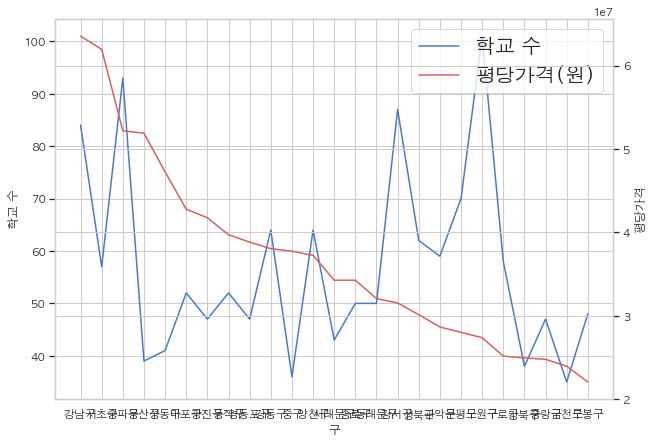

In [110]:
plt.figure(figsize=(4,3))

fig, ax1 = plt.subplots()
ax1.set_xlabel('구')
ax1.set_ylabel('학교 수')
line1=ax1.plot(sch_df['주소'],sch_df['합계'],'b',label='학교 수')
ax2 = ax1.twinx()
ax2.set_ylabel('평당가격')
line2=ax2.plot(sch_df['주소'],sch_df['평당가격'],'r',label='평당가격(원)')
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right',fontsize=20)
plt.show()

> - 각 자치구별 학교 수와 평당 가격은 관련이 없어보인다


In [27]:
aca=pd.read_csv('../data/서울시 학생 1만명당 사설학원수 통계.csv',encoding="cp949")
aca

,기간,자치구,초·중·고 학생수,사설학원수,학생1만명당 사설학원수
0,2020,합계,840933,13992,166
1,2020,종로구,16452,243,148
2,2020,중구,13566,109,80
3,2020,용산구,15852,154,97
4,2020,성동구,20447,289,141
5,2020,광진구,28972,405,140
6,2020,동대문구,26533,350,132
7,2020,중랑구,27353,262,96
8,2020,성북구,37884,439,116
9,2020,강북구,21398,206,96


In [92]:
aca_df=pd.merge(aca,k,left_on=['자치구'], right_on=['시군구명'])
aca_df=aca_df.sort_values(by='평당가격',ascending=False)
aca_df2=aca_df
aca_df2['평당가격']=aca_df2['평당가격']/100000
aca_df #자치구별 사설학원수와 평당가격

area_c = pd.DataFrame({'시군구명':['강남구','서초구','송파구','용산구','성동구','마포구','광진구','동작구','영등포구','강동구','중구','양천구','서대문구','종로구','동대문구','강서구','성북구','관악구','은평구','노원구','구로구','강북구','중랑구','금천구','도봉구'],
                      '분위':[1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,4]})

aca_dff=pd.merge(aca_df2,area_c,left_on=['자치구'], right_on=['시군구명'])
aca_dff

,기간,자치구,초·중·고 학생수,사설학원수,학생1만명당 사설학원수,평당가격,시군구명,분위
0,2020,강남구,59344,2361,398,635,강남구,1
1,2020,서초구,43580,1148,263,619,서초구,1
2,2020,송파구,62219,1076,173,522,송파구,1
3,2020,용산구,15852,154,97,519,용산구,1
4,2020,성동구,20447,289,141,473,성동구,1
5,2020,마포구,27821,689,248,428,마포구,2
6,2020,광진구,28972,405,140,417,광진구,2
7,2020,동작구,29160,471,162,397,동작구,2
8,2020,영등포구,25331,445,176,388,영등포구,2
9,2020,강동구,42374,724,171,380,강동구,2


<Figure size 288x216 with 0 Axes>

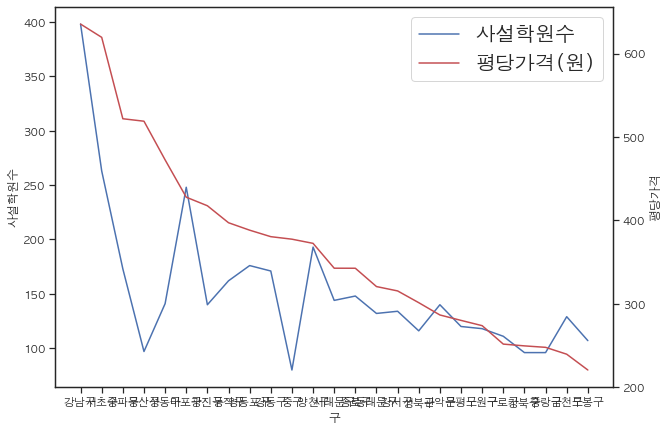

In [118]:
plt.figure(figsize=(4,3))
fig, ax1 = plt.subplots()
ax1.set_xlabel('구')
ax1.set_ylabel('사설학원수')
line1=ax1.plot(aca_df['자치구'],aca_df['학생1만명당 사설학원수'],'b',label='사설학원수')
ax2 = ax1.twinx()
ax2.set_ylabel('평당가격')
line2=ax2.plot(aca_df['자치구'],aca_df['평당가격'],'r',label='평당가격(원)')
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right',fontsize=20)

plt.show()

> - 공교육기관인 학교의 수보다 사설학원 수가 학구열을 나타내기에 더 적합

              기간  초·중·고 학생수  사설학원수  학생1만명당 사설학원수  평당가격
기간           nan        nan    nan           nan   nan
초·중·고 학생수    nan          1      1             0     0
사설학원수        nan          1      1             1     1
학생1만명당 사설학원수 nan          0      1             1     1
평당가격         nan          0      1             1     1


<AxesSubplot:>

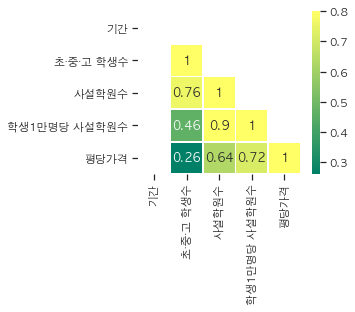

In [95]:
plt.figure(figsize=(4,3))
aca_df.corr()
corr1 = aca_df
corr1 = corr1.corr()
print(corr1)

mask = np.array(corr1)
mask[np.tril_indices_from(mask)] = False 
sns.heatmap(corr1,
            mask=mask,
            vmax=0.8,
            square=True,
            annot=True,
           linewidths=0.8,
            cmap='summer'
           )

> '평당가격'과 '학생 1만명당 사설학원수'의 상관계수가 0.72로 1에 가까운 상관계수를 갖는다.

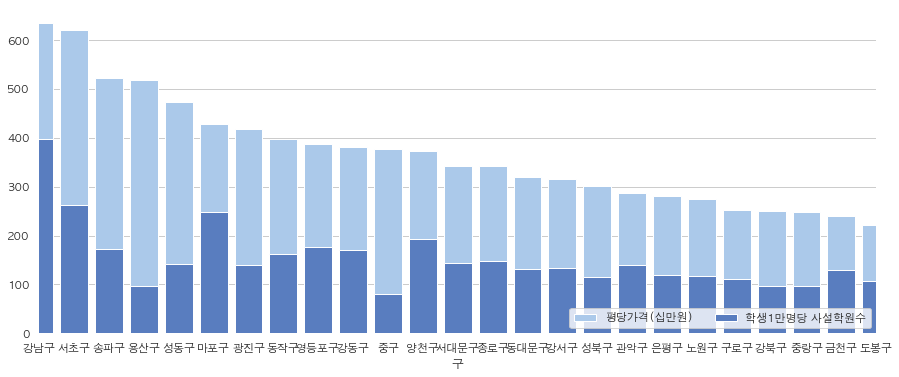

In [108]:
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'AppleGothic'
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x="자치구", y="평당가격", data=aca_df2,
            label="평당가격(십만원)", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="자치구", y="학생1만명당 사설학원수", data=aca_df2,
            label="학생1만명당 사설학원수", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="구")
sns.despine(left=True, bottom=True)

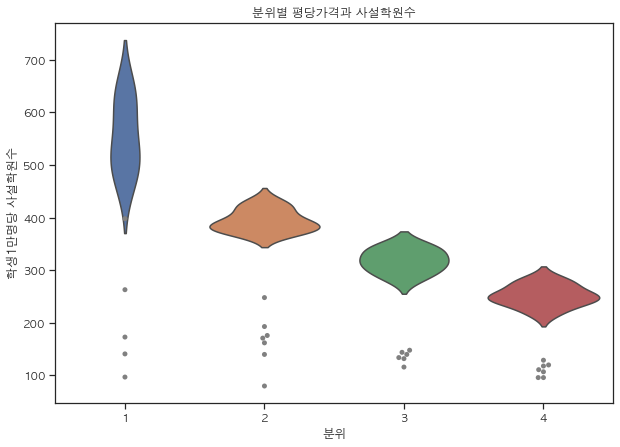

In [111]:
#분위별로 시각화
sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = (10, 7)
#Violin plot과 Swarm Plot로 표현
plt.title("분위별 평당가격과 사설학원수")
sns.violinplot(x="분위", y="평당가격", data=aca_dff, inner=None)
sns.swarmplot(x="분위", y="학생1만명당 사설학원수", data=aca_dff, color="0.5")
plt.show()


## 분석결과
 서울시 아파트 실거래가가 높을 수록 교육기관인 학교의 수가 많을 것이라 예상하였다. 하지만 공교육 기관인 학교의 수로 해당 지역의 학구열을 나타내긴 어려울것이라 판단 되었고 좀 더 학구열과 직접적인 관련이 있는 사설학원의 수를 분석하였다. 분석결과 평당가격이 서울에서 가장 높은 강남구의 경우 사설학원의 수가 다른 지역에 비해 10배가까이 많은 것으로 나타나 각 자치구별 사설학원의 수와 평당가격이 양의 관계를 갖는 것으로 보인다. 따라서 교육이 서울시 아파트 실거래가에 영향을 끼치는 요소로 볼 수 있다.